In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("TempData/quesion4/ZhuChengFen(Type).csv",encoding="ANSI")

In [2]:
'''提取每个类排名靠前的人物活跃年代'''
score_data=pd.read_csv("TempData/first_sort.csv",encoding='utf-8')
information=pd.read_csv("TempData/pure_information.csv",encoding='utf-8')
people_data=pd.merge(score_data,information,left_on='end',right_on='id',how='inner')
people_data=people_data.drop(columns=['end'])

In [3]:
dict_zheng={'1':'Pop/Rock','2':'Country','3':'Classical','4':'Electronic','5':'Comedy/Spoken',
'6':'Easy Listening','7':'Reggae','8':'Jazz','9':'R&B;','10':'Latin','11':'Vocal',
'12':'Folk','13':'International','14':'Avant-Garde','15':'Blues','16':'Stage & Screen','17':'New Age','18':'Religious',
'19':"Children's",'20':'Unknown'}
dict_fan={'Pop/Rock':1,'Country':2,'Classical':3,'Electronic':4,'Comedy/Spoken':5,
'Easy Listening':6,'Reggae':7,'Jazz':8,'R&B;':9,'Latin':10,'Vocal':11,
'Folk':12,'International':13,'Avant-Garde':14,'Blues':15,'Stage & Screen':16,'New Age':17,'Religious':18,
"Children's":19,'Unknown':20}
def get_label(x):
    x=str(x)
    return dict_fan[x]
people_data["label"]=people_data["type"].apply(get_label)

In [4]:
group2=people_data.groupby('type')
influece_year={}
for a,b in group2:
    b.sort_values(by="score" , inplace=True, ascending=False)
    label=b.iloc[0,4]
    influece_year[str(label)]=list(b.iloc[:3,2])
print(influece_year)

{'14': [1960, 1950, 1960], '15': [1930, 1940, 1930], '19': [1950], '3': [1930, 1960, 1940], '5': [1930, 1960, 1950], '2': [1930, 1930, 1930], '6': [1940, 1950, 1940], '4': [1970, 1990, 1960], '12': [1930, 1960, 1960], '13': [1960, 1950, 1930], '8': [1940, 1930, 1930], '10': [1940, 1960, 1960], '17': [1970, 1970, 1960], '1': [1960, 1960, 1960], '9': [1950, 1960, 1970], '7': [1960, 1960, 1960], '18': [1950, 1930, 1960], '16': [1930, 1940, 1950], '20': [1980, 1970], '11': [1930, 1930, 1930]}


<ipython-input-4-7b97b8609fb1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.sort_values(by="score" , inplace=True, ascending=False)


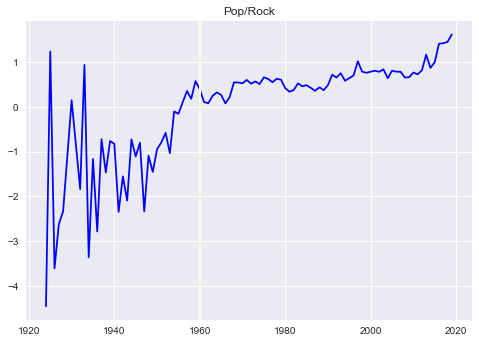

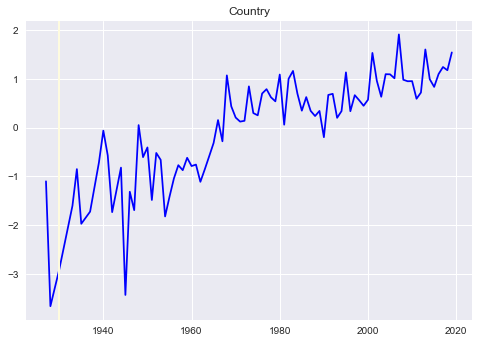

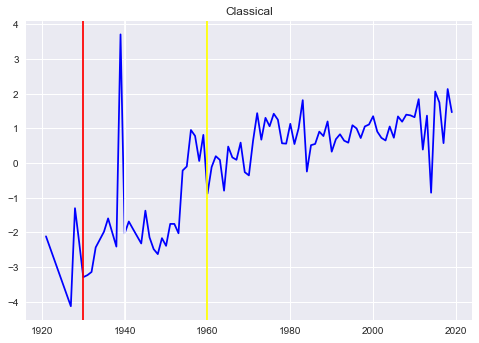

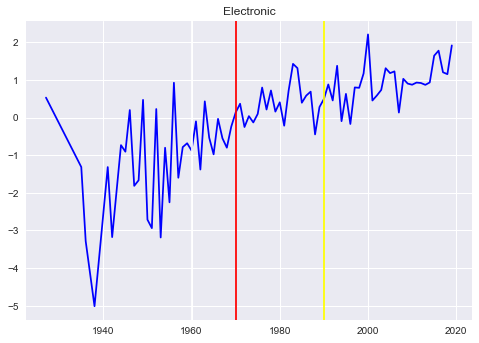

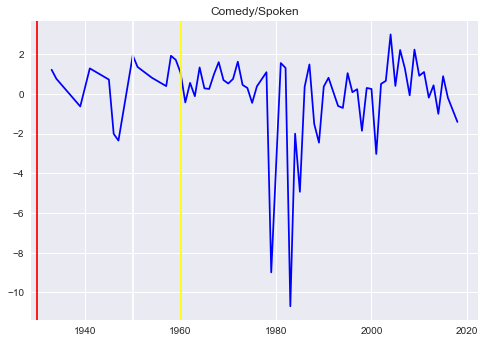

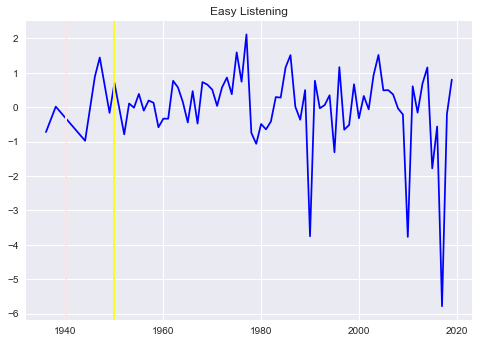

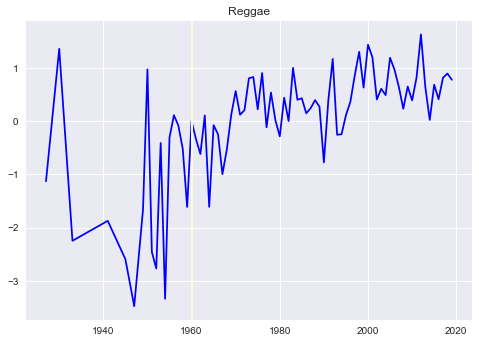

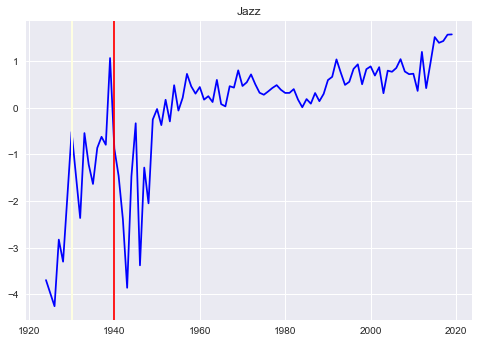

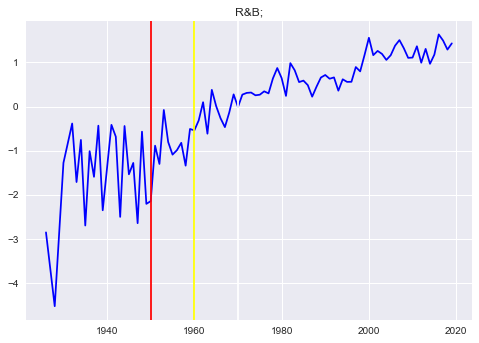

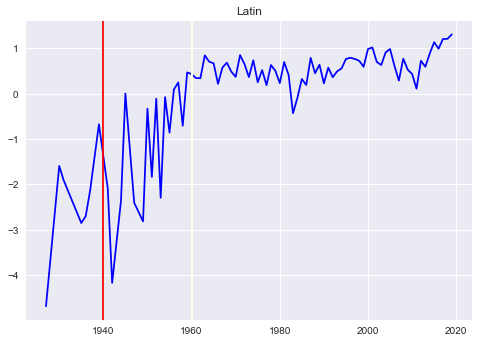

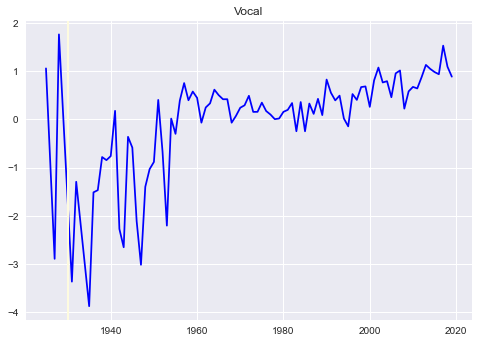

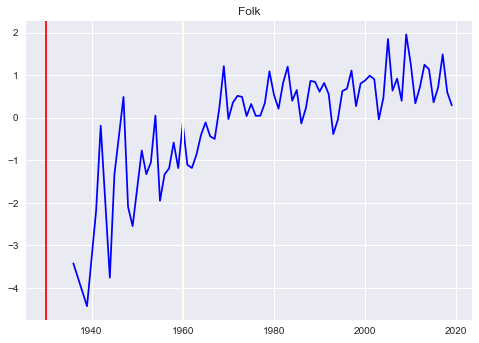

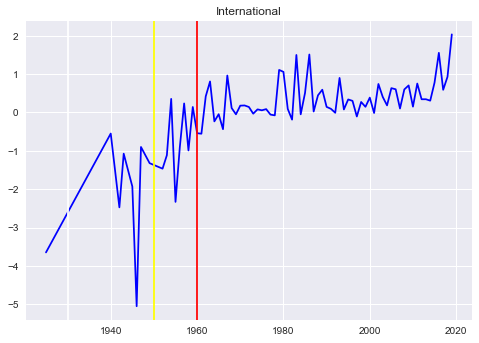

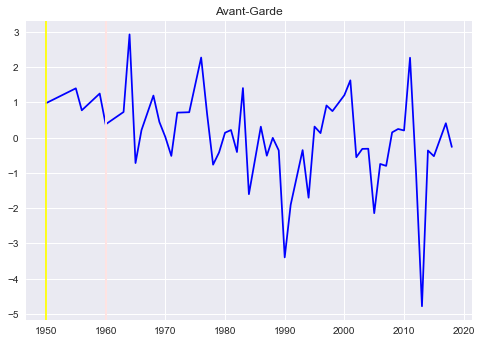

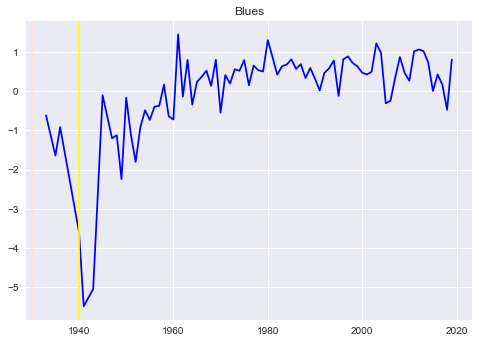

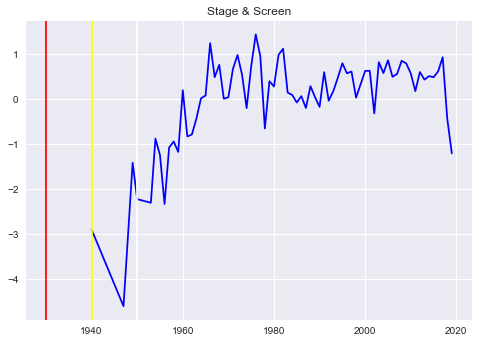

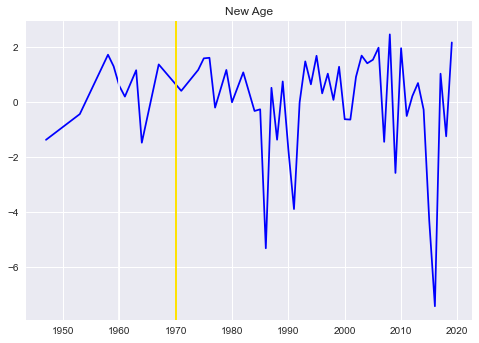

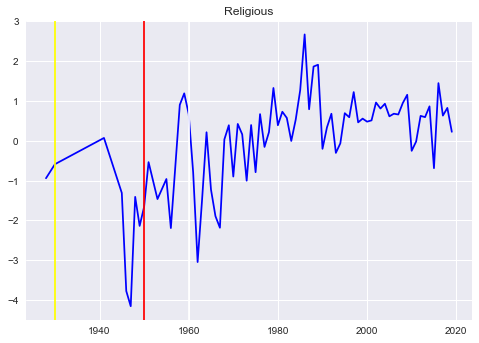

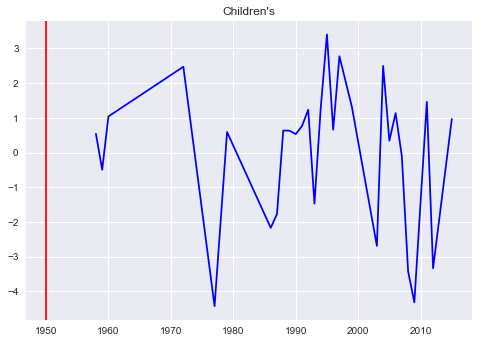

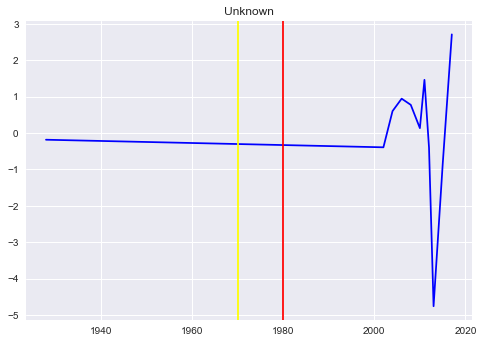

In [5]:
x=[]
y=[]
year=[]
title=[]
group=data.groupby("type")
plt.style.use("seaborn")
for a,b in group:
    a=str(a)
    x.append(b['时间'].tolist())
    y.append(b['综合评价'].tolist())
    year.append(influece_year[str(a)])
    title.append(dict_zheng[str(a)])
for i in range(len(x)):
    plt.figure(i)
    plt.plot(x[i],y[i],'b-')
    plt.title(title[i])
    for j in range(len(year[i])):
        if j==0:
            plt.axvline(year[i][j],color='red')
        if j==1:
            plt.axvline(year[i][j],color='yellow')
        if j==2:
            plt.axvline(year[i][j],color='white')

In [6]:
'''第四题第二问'''
left_data=pd.read_csv("TempData/quesion4/ZhuChengFen(Person).csv",encoding='utf-8')[['id','A','B']]
right_data=pd.read_csv("TempData/pure_information.csv",encoding='utf-8')
data=pd.merge(left_data,right_data,on='id',how='inner')
data.to_csv("TempData/quesion4/ZhuChengFen(information).csv",encoding='utf-8',index=False)
people_data.to_csv("TempData/quesion4/people_influence_type_year.csv",index=False,encoding='utf-8')

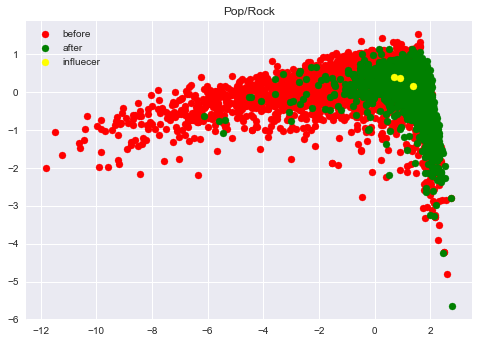

In [7]:
pop=data[data['type']=='Pop/Rock']
before=data[data['year']>1960]
after=data[data['year']<=1960]
before_x=before['A'].tolist()
before_y=before['B'].tolist()
after_x=after['A'].tolist()
after_y=after['B'].tolist()
plt.title('Pop/Rock')
plt.scatter(before_x,before_y,color='red',label='before')
plt.scatter(after_x,after_y,color='green',label='after')
plt.scatter(0.90281467,0.351973751,color='yellow',label='influecer')
plt.scatter(1.383481517,0.141497347,color='yellow')
plt.scatter(0.685660194,0.393504889,color='yellow')
plt.legend()

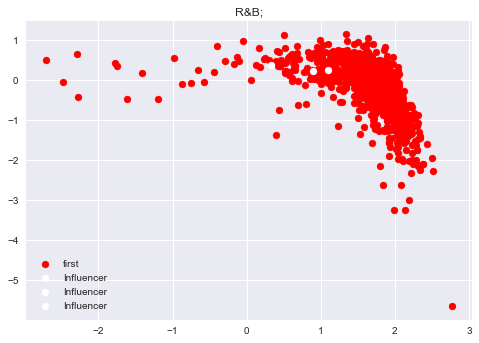

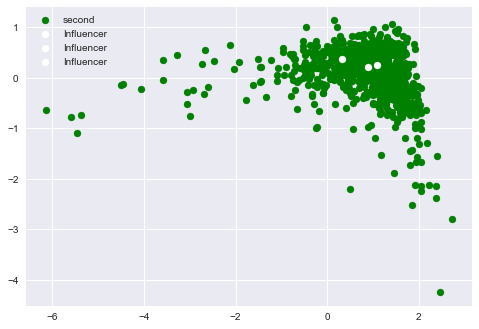

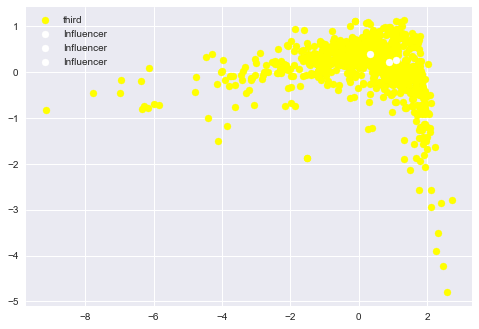

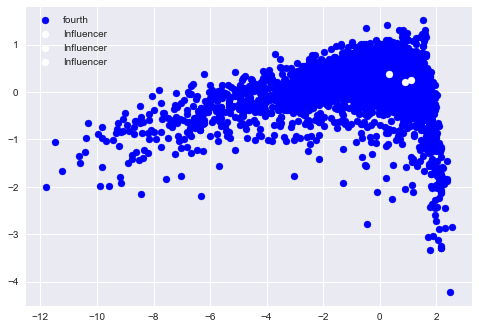

In [8]:
pop=data[data['type']=='R&B;']
first=data[data['year']<=1950]
second=data[(data['year']<=1960)&(data['year']>1950)]
third=data[(data['year']<=1970)&(data['year']>1960)]
fourth=data[data['year']>1970]
plt.title('R&B;')
plt.figure(1)
plt.scatter(first['A'].tolist(),first['B'].tolist(),color='red',label='first')
plt.scatter(1.092062568,0.253893564,color='white',label='Influencer')
plt.scatter(0.887482683,0.217627884,color='white',label='Influencer')
plt.scatter(0.32335401,0.376579976,color='white',label='Influencer')
plt.legend()
plt.figure(2)
plt.scatter(second['A'].tolist(),second['B'].tolist(),color='green',label='second')
plt.scatter(1.092062568,0.253893564,color='white',label='Influencer')
plt.scatter(0.887482683,0.217627884,color='white',label='Influencer')
plt.scatter(0.32335401,0.376579976,color='white',label='Influencer')
plt.legend()
plt.figure(3)
plt.scatter(third['A'].tolist(),third['B'].tolist(),color='yellow',label='third')
plt.scatter(1.092062568,0.253893564,color='white',label='Influencer')
plt.scatter(0.887482683,0.217627884,color='white',label='Influencer')
plt.scatter(0.32335401,0.376579976,color='white',label='Influencer')
plt.legend()
plt.figure(4)
plt.scatter(fourth['A'].tolist(),fourth['B'].tolist(),color='blue',label='fourth')
plt.scatter(1.092062568,0.253893564,color='white',label='Influencer')
plt.scatter(0.887482683,0.217627884,color='white',label='Influencer')
plt.scatter(0.32335401,0.376579976,color='white',label='Influencer')
plt.legend()